In [1]:
import pandas as pd
import os as os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

os.chdir('c://users/grlurton/Google Drive/elections_niger')

In [2]:
store_electeurs = pd.HDFStore('data/full_data.h5')
data_electeurs = store_electeurs['complete_data']
store.close()

In [3]:
data['age'] = pd.datetime(2016, 2 , 21) - data['date_de_naissance']
data['age'] = data['age'].astype('timedelta64[D]') / 365.25

In [6]:
from collections import OrderedDict
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.models import HoverTool 
from bokeh.models.widgets.layouts import VBox,HBox
from bokeh.models.widgets import Dropdown
from bokeh.io import vform

In [7]:
region_date = data['age'].groupby(data['ID_DEPART']).median()
num_colors = 5
bins = np.linspace(region_date.min(), region_date.max(), num_colors)
region_date = region_date.reset_index()
region_date['bin'] = np.digitize(region_date['age'], bins) - 1
region_date.sort_values('bin', ascending=False)
region_date = region_date.set_index('ID_DEPART')

In [8]:
len(data[data['ID_REGION'] != 9]['ID_DEPART'].unique())

65

In [10]:
regions = dept_map[ 'features']

In [16]:
regions[55]

{'geometry': {'coordinates': [[[2.786499023437516, 13.872924804687614],
    [2.842285156250102, 13.861511230468714],
    [2.862304687500095, 13.862915039062528],
    [2.876525878906266, 13.869873046875114],
    [2.89648437500013, 13.864318847656342],
    [2.91510009765622, 13.8471069335938],
    [2.946472167968894, 13.840087890625085],
    [3.00207519531247, 13.840087890625085],
    [3.016479492187651, 13.835693359375078],
    [3.036315917968901, 13.828674316406364],
    [3.039306640625095, 13.814270019531271],
    [3.019287109375102, 13.804321289062493],
    [3.023498535156277, 13.790100097656321],
    [3.044921874999906, 13.788696289062507],
    [3.094909667968671, 13.7786865234376],
    [3.13909912109388, 13.75708007812505],
    [3.147521972656409, 13.759521484375014],
    [3.134704589843784, 13.732299804687564],
    [3.13049316406252, 13.709716796874993],
    [3.11010742187513, 13.599121093750021],
    [3.10430908203122, 13.599121093750021],
    [3.06768798828122, 13.59930419921876

In [13]:
colors = ["#edf8fb","#b2e2e2","#66c2a4",'#2ca25f',"#006d2c"]
regions_names = []
regions_ID = []
xs = []
ys = []
values = []
cols = []
for i in range(len(regions)) :
    x = []
    y = []
    reg_sel = regions[i]
    name = reg_sel['properties']['DEPART']
    ID = reg_sel['properties']['KEY_DEPARTEMENT']
    print(ID)
    coordinates = reg_sel['geometry']['coordinates'][0]
    for j in range(len(coordinates)) :
        x.append(coordinates[j][0])
        y.append(coordinates[j][1])
    
    
    
    
    #if name[0:6] == 'NIAMEY' :
    #    val_niam = val
    #    col_niam = col
    #    x_niam = x
    #    y_niam = y
    #    ID_niam = ID

    if (pd.isnull(ID) == False) & (ID != 590) :
        val = region_date['age'][ID]
        col = colors[region_date['bin'][ID].astype(int)]
        values.append(val)
        regions_names.append(name)
        regions_ID.append(ID)
        xs.append(x)
        ys.append(y)
        cols.append(col)
    
#regions_names.append('NIAMEY')
#values.append(val_niam)
#regions_ID.append(ID_niam)
#xs.append(x_niam)
#ys.append(y_niam)
#cols.append(col_niam)
    

    
    
source_rate = ColumnDataSource(
    data = dict(
        x=xs,
        y=ys,
        ID=regions_ID,
        name=regions_names ,
        value = values ,
        colors = cols
    )
)

601
501
101
401
102
602
502
604
605
701
402
103
503
301
201
504
403
702
202
302
303
304
703
305
606
306
404
607
203
704
405
104
505
105
705
506
608
307
507
406
706
204
508
407
707
205
206
None
None
None
None
None
890
609
610
None
590
708
709
510
511
106
710
408
308
612
512
613
611


In [12]:
output_notebook()

TOOLS="pan,wheel_zoom,reset,hover"

p = figure(plot_width=700, plot_height=700,
           tools=TOOLS, title="Age Médian")

p.patches('x', 'y',
    fill_color='colors' ,
    line_color="grey", line_width=0.5,
    source=source_rate)

hover = p.select(dict(type=HoverTool))
hover.point_policy = "follow_mouse"
hover.tooltips = OrderedDict([
    ("Nom", "@name"),
    ("Age Médian", "@value")   
])

show(p)

BokehJS successfully loaded.

chrome://flags/#touch-events

desactiver

In [20]:
month = data['date_de_naissance'].apply(lambda x: x.month)
day = data['date_de_naissance'].apply(lambda x: x.day)
year = data['date_de_naissance'].apply(lambda x: x.year)

In [21]:
date_full = (month == 1) & (day == 1)

In [22]:
data['jour_naissance'] = day
data['mois_naissance'] = month
data['annee_naissance'] = year

In [23]:
data['date_naissance_exacte'] = (data['jour_naissance'] != 1) & (data['mois_naissance'] != 1)

In [24]:
def proportion_date_naissance(data) :
    out = sum(data['date_naissance_exacte']) / len(data)
    return out

In [31]:
data_nn = data[~(pd.isnull(data['date_de_naissance']))]
d = data_nn.groupby(['annee_naissance','NOM_REGION']).apply(proportion_date_naissance)

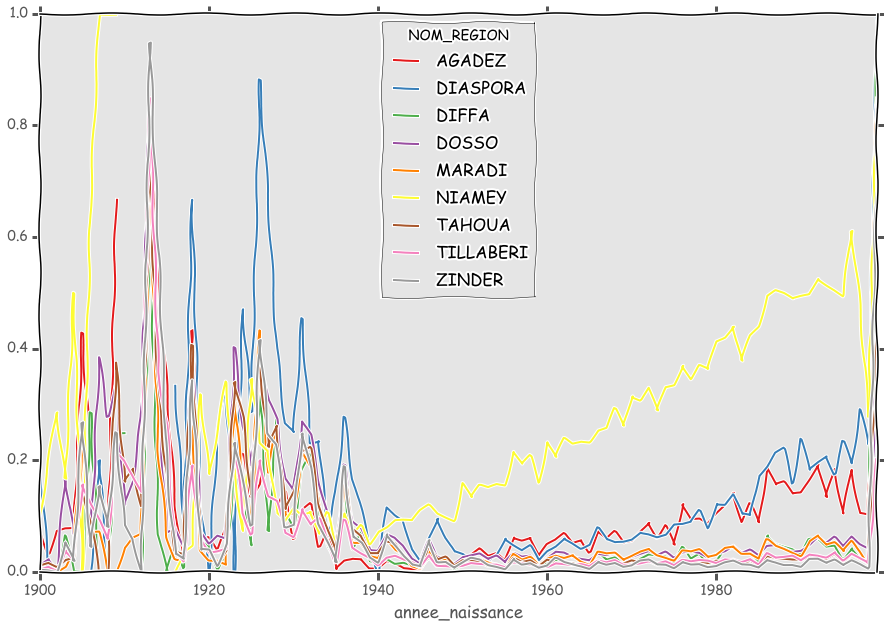

In [42]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
import numpy as np

plt.xkcd()
d.unstack('NOM_REGION').plot(figsize=(15, 10) , colormap = 'Set1')

In [ ]:
#Age Distributions : ser.plot(kind='kde')
# Dist of voters by bureau